INSTALLING PACKAGES

In [84]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision
!pip3 install --no-cache-dir -I pillow


    100% |████████████████████████████████| 2.0MB 36.9MB/s 


DOWNLOAD DATA

In [0]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile


train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

In [86]:
!ls train/images/im1.jpg

train/images/im1.jpg


In [0]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


In [0]:
PATH = "train/images/"

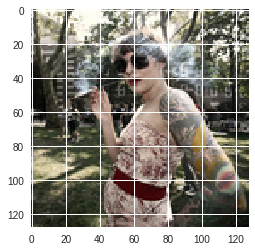

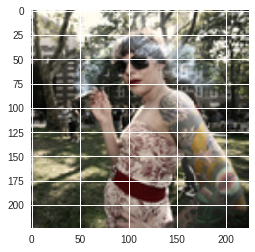

In [7]:
img=mpimg.imread(f'{PATH}/im1.jpg')
imgplot = plt.imshow(img)
plt.show()

im = cv2.imread(f'{PATH}/im1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Image functions

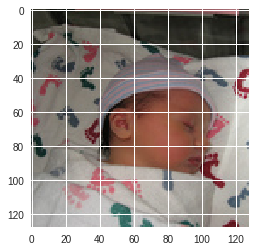

In [6]:
#by path
def plot_imgname(name):
  img=mpimg.imread(f'{PATH}{name}.jpg')
  imgplot = plt.imshow(img)
  plt.show()

plot_imgname('im185')

#check if grayscale
def is_grey_scale(path):
    
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

def plot_image(tensor):
  if tensor.shape[0] == 3:
    x = tensor.permute(1,2,0).data.numpy()
    plt.imshow(x)
  elif tensor.shape[0] == 1:
    x = tensor.permute(1,2,0).squeeze(2).data.numpy()
    plt.imshow(x, cmap='gray')

In [0]:
# check all the classes

from os import listdir
from os.path import isfile, join
classes = [f[:-4] for f in listdir('train/annotations/') if isfile(join('train/annotations/', f))]

In [10]:
classes

['portrait',
 'car',
 'clouds',
 'night',
 'baby',
 'river',
 'female',
 'tree',
 'male',
 'dog',
 'flower',
 'bird',
 'people',
 'sea']

In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [0]:
# distribution of the classes
path='train/annotations/'

dist = dict([(f'{f[:-4]}',file_len(f'{path}{f}')) for f in listdir(path) if isfile(join(path, f))])
            
            

In [13]:
dist

{'baby': 95,
 'bird': 360,
 'car': 319,
 'clouds': 1095,
 'dog': 448,
 'female': 3227,
 'flower': 761,
 'male': 2979,
 'night': 598,
 'people': 6403,
 'portrait': 3121,
 'river': 120,
 'sea': 173,
 'tree': 525}

<Container object of 14 artists>

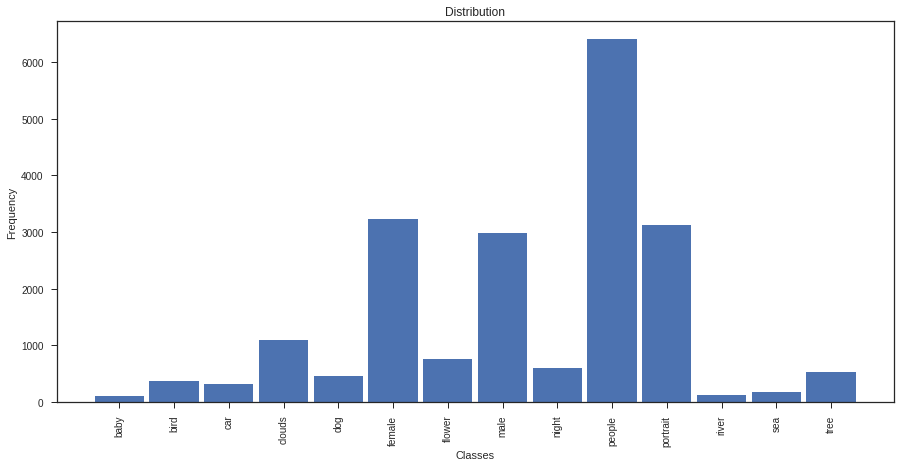

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.title(f"Distribution")
plt.bar(dist.keys(), dist.values(), width=0.9, color='b')

In [15]:
# sort all the images from im1....imn
file_col = listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col]
list1.sort()
listfin = ["train/images/im"+str(num)+".jpg" for num in list1]

file_col = pd.Series(listfin)

# creation of the dataframe 
df = pd.DataFrame()
df["fileName"] = file_col

path = "train/annotations"

row = 0

# file dic contains how many samples there are for each class. Is it needed?
file_dic = {}

for label, filename in enumerate(listdir(path)):
  # array of zeros (20000,) that will be one column of the df
  tmp = np.zeros(file_col.shape[0], dtype=int)
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      # get the line that contains that image
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1   # set 1 for the image that contains that class 
      file_len = file_len + 1
  filename = filename[:-4]
  tmp = pd.Series(tmp)
  df[filename] = tmp
  file_dic[filename] = file_len

print(file_dic)

{'portrait': 3121, 'car': 319, 'clouds': 1095, 'night': 598, 'baby': 95, 'river': 120, 'female': 3227, 'tree': 525, 'male': 2979, 'dog': 448, 'flower': 761, 'bird': 360, 'people': 6403, 'sea': 173}


In [16]:
df.shape

(20000, 15)

In [17]:
df.head()


,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [88]:
# displaying inline pandas images
import glob
import random
import base64
from io import BytesIO
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)

# put the PIL image in the df

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i
  
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df['image'] = df.fileName.map(lambda f: get_thumbnail(f))
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE954AC19E8>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE954AC1E10>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE954AC16D8>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE954A90E10>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE991EE88D0>,"[male, people]"


In [19]:
df.shape

(20000, 16)

In [0]:
def vec2label (df):
  l = []
  for i in range(df.shape[0]):
    p = []
    for k in df.columns[1:-1]:
      if df.loc[i][f'{k}']:
        p.append(k)
    l.append(p)
  l = pd.Series(l)
  return l

df['classes']= vec2label(df)

In [21]:
df.shape

(20000, 17)

,fileName,image,classes
0,train/images/im1.jpg,,"[portrait, female, people]"
1,train/images/im2.jpg,,[]
2,train/images/im3.jpg,,[]
3,train/images/im4.jpg,,"[male, people]"
4,train/images/im5.jpg,,"[male, people]"
5,train/images/im6.jpg,,[]
6,train/images/im7.jpg,,"[female, people]"
7,train/images/im8.jpg,,[]
8,train/images/im9.jpg,,[]
9,train/images/im10.jpg,,[]

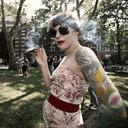
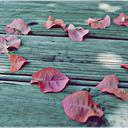
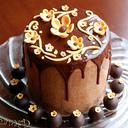
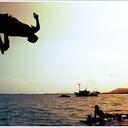
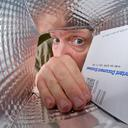
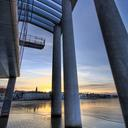
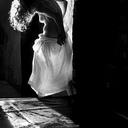
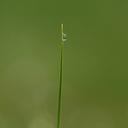
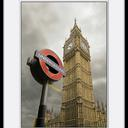
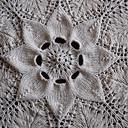
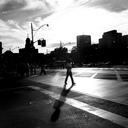
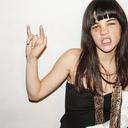
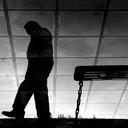
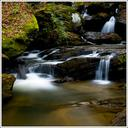
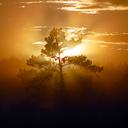
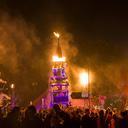
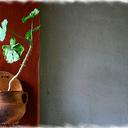
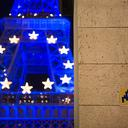
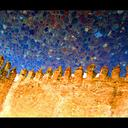
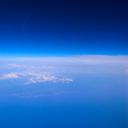

In [22]:
HTML(df[['fileName', 'image','classes']].head(20).to_html(formatters={'image': image_formatter}, escape=False))

In [23]:
mask = df['classes'].astype(str) == '[]' 
missing_values = sum(mask)
print("missing values:", missing_values)

missing values: 9824


In [24]:
# percentage of images without class
print((missing_values/20000)*100)

49.120000000000005


In [25]:
# delete all the values without target
df = df[~mask]
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D1B400>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D1BE80>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D60710>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE992D60B38>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE992D60908>,"[male, people]"


In [0]:
df.to_csv("data.csv")

In [27]:
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D1B400>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D1BE80>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FE992D60710>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE992D60B38>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7FE992D60908>,"[male, people]"


In [28]:
print(df.iloc[0,0])

train/images/im1.jpg


In [0]:
# PREPARING THE DATALOADER
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings ?
import warnings
warnings.filterwarnings("ignore")
import operator

class ImageDataset:
  def __init__ (self, csv_file, transformations=None):
    self.data_frame = pd.read_csv(csv_file)
    self.data_frame=self.data_frame.drop(['Unnamed: 0'], axis=1)
    self.to_tensor = transforms.ToTensor()
    # for data augmentation
    self.transformations = transformations
      
  
  def __len__(self):
        return len(self.data_frame)
   
  def __getitem__(self, idx):
    
    # Get image name from the pandas df
    single_image_name = self.data_frame.iloc[idx,0]
    
    # Open image
    img_as_img = Image.open(single_image_name).convert("RGB")
    
    if self.transformations:
      img_as_img = self.transformations(img_as_img)

    # Transform image to tensor
    img_as_tensor = self.to_tensor(img_as_img)
    
    labels = np.asarray(self.data_frame.iloc[idx,1:-2], dtype=np.int16)
    labels_classes = self.data_frame.iloc[idx,16]
    sample = dict({'image': img_as_tensor, 'labels': labels, 'classes':labels_classes})
    return (sample)
  
  
        
    


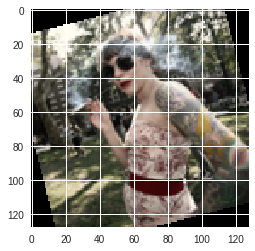

In [8]:
tfs = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
])

image_dataset = ImageDataset("data.csv", tfs)
plot_image(image_dataset.__getitem__(0)['image'])


0 torch.Size([3, 128, 128]) ['portrait', 'female', 'people']
1 torch.Size([3, 128, 128]) ['male', 'people']
2 torch.Size([3, 128, 128]) ['male', 'people']
3 torch.Size([3, 128, 128]) ['female', 'people']
4 torch.Size([3, 128, 128]) ['male', 'people']


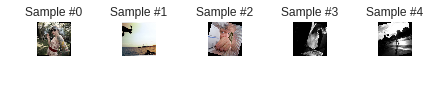

In [90]:
fig = plt.figure()

for i in range(len(image_dataset)):
    sample = image_dataset[i]
    print(i, sample['image'].shape, sample['classes'])
    
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plot_image(sample['image'])
   
    if i == 4:
        plt.show()
        break

In [32]:
image_dataset.__getitem__(1)

{'classes': "['male', 'people']",
 'image': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000

split training and test set 90-10 split

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1)
'''
train_data.index = range(len(train_data.index))
test_data.index = range(len(test_data.index))
'''
test_data.to_csv('./test.csv')
train_data.to_csv('./train.csv')


In [9]:
train_dataset = ImageDataset("train.csv", tfs)
test_dataset = ImageDataset("test.csv", tfs)

dataloader = DataLoader(image_dataset, batch_size=32, shuffle=True, num_workers=4)
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([32, 3, 128, 128]) ["['male', 'people']", "['portrait', 'female', 'people']", "['male', 'people']", "['clouds']", "['portrait', 'baby', 'male', 'people']", "['female', 'people']", "['male', 'people']", "['male', 'people']", "['clouds']", "['night', 'people']", "['night']", "['people']", "['female', 'male', 'dog', 'people']", "['bird']", "['female', 'people']", "['portrait', 'female', 'people']", "['people']", "['people']", "['portrait', 'female', 'people']", "['night']", "['clouds']", "['clouds']", "['tree']", "['portrait', 'female', 'people']", "['flower']", "['female', 'people']", "['night']", "['dog']", "['night']", "['portrait', 'female', 'people']", "['portrait', 'female', 'people']", "['portrait', 'female', 'people']"]
1 torch.Size([32, 3, 128, 128]) ["['female', 'people']", "['female', 'dog']", "['portrait', 'male', 'people']", "['portrait', 'female', 'people']", "['clouds']", "['female', 'people']", "['flower']", "['people']", "['female', 'people']", "['portrait', 

In [19]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True,num_workers=4)
validation_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False,num_workers=4)

for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([32, 3, 128, 128]) ["['flower']", "['portrait', 'female', 'people']", "['female', 'people']", "['dog']", "['people']", "['portrait', 'female', 'people']", "['male', 'people']", "['bird']", "['clouds']", "['portrait', 'female', 'people']", "['portrait', 'male', 'people']", "['portrait', 'female', 'people']", "['night']", "['portrait', 'people']", "['tree']", "['portrait', 'female', 'people']", "['portrait', 'female', 'people']", "['flower']", "['portrait', 'male', 'people']", "['clouds']", "['male', 'people']", "['female', 'male', 'people']", "['male', 'people']", "['portrait', 'female', 'people']", "['night']", "['car']", "['tree']", "['night']", "['female', 'people']", "['night']", "['flower']", "['flower']"]
1 torch.Size([32, 3, 128, 128]) ["['clouds']", "['clouds']", "['dog']", "['female', 'people']", "['car']", "['people', 'sea']", "['night']", "['bird']", "['male', 'people']", "['portrait', 'female', 'people']", "['clouds']", "['male', 'people']", "['people']", "['tre

In [0]:
!mkdir train, test

In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
         # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)  
        self.dropout = nn.Dropout(p=0.5)
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32*30*30, 14)
     
    def forward(self, x):
        # Convolution 1
        out = F.relu(self.cnn1(x))
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = F.relu(self.cnn2(out))
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
    


In [0]:
def train(train_loss, epoch, log_interval=100):
    model.train()
    loss_temp=0
    for batch_idx, databatch in enumerate(train_loader):
        data = databatch['image'].cuda().float()
        target = databatch['labels'].cuda().float()
        optimizer.zero_grad() 
        output = model(data)
        loss = criterion(output, target)
        loss_temp+=loss
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
        
    train_loss.append(loss_temp/len(train_loader))

In [0]:
from sklearn.metrics import f1_score
def validate_f1(loss_vector):
    model.eval()
    val_loss, f1 = 0, 0
    for databatch in (validation_loader):
        data = databatch['image'].cuda().float()
        target = databatch['labels'].cuda().float()
        output = model(data)

        val_loss += criterion(output, target).data.item()
        pred = torch.tensor((torch.exp(output) > 0.5),dtype=torch.float).cuda()
        
        y_true = target.cpu().detach().numpy()
        y_pred = pred.cpu().detach().numpy()
        
        # print(y_true)
        # print(y_pred)
        
        f1 += f1_score(y_true, y_pred, average='micro') 

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    
    print('\nValidation set: Average loss: {:.4f}, F1-score: {}\n'.format(
        val_loss, f1))

In [0]:
# PRECISION AND RECALL

def precision(true_pos, false_pos):
  if true_pos+false_pos == 0:  # avoids to return nan
    return 0
  return (true_pos / (true_pos+false_pos))

def recall(true_pos, false_neg):  
  if true_pos+false_neg == 0:  # avoids to return nan
    return 0
  return (true_pos / (true_pos+false_neg))

In [0]:
import seaborn as sn

# this function calculates precision and recall FOR EACH CLASS

def validate_model(loss_vector, n_class):
    model.eval()
    val_loss = 0
    
    true_pos = np.array([0 for c in classes])
    false_pos = np.array([0 for c in classes])
    false_neg = np.array([0 for c in classes])
    
    precision_sum = np.zeros(14)
    recall_sum = np.zeros(14)
    
    for databatch in (validation_loader):
        data = databatch['image'].cuda().float()
        target = databatch['labels'].cuda().float()
        output = model(data)
        
        val_loss += criterion(output, target).data.item()
        pred = torch.tensor((torch.exp(output) > 0.5),dtype=torch.float).cuda()
        
        y_true = target.cpu().detach().numpy()
        y_pred = pred.cpu().detach().numpy()
        
        # for each output check if the elements predicted are true_pos,
        # false_pos or false_neg
        
        for idx in range(y_true.shape[0]):
          true_elem = y_true[idx]
          pred_elem = y_pred[idx]
          
          # print("true", true_elem)
          # print("pred", pred_elem)
          for idx2 in range(len(true_elem)):
            if true_elem[idx2] == pred_elem[idx2] and true_elem[idx2] == 1:
              true_pos[idx2] += 1
            elif true_elem[idx2] != pred_elem[idx2]:
              if pred_elem[idx2] == 1:
                false_pos[idx2] += 1
              else:
                false_neg[idx2] += 1
        
        # print("true pos", true_pos)
        # print("false pos", false_pos)
        # print("false neg", false_neg)
          
        # calculate the precision and recall for this batch
        precision_vec = [precision(true_pos[c], false_pos[c]) for c in range(n_class)]
        recall_vec = [recall(true_pos[c], false_neg[c]) for c in range(n_class)]
        
        precision_vec = np.array(precision_vec)
        recall_vec = np.array(recall_vec)
        
        # print("precision:", precision_vec)
        # print("recall:", recall_vec)
        
        # element-wise sum of the batch precision and recall
        precision_sum += precision_vec  
        recall_sum += recall_vec
      
    # print("precision:", precision_sum)
    # print("recall:", recall_sum)
      
    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    
    print('\nValidation set: Average loss: {:.4f}\n, precision: \n{}\n, recall: \n{}\n'.format(
        val_loss, precision_sum, recall_sum))
        

In [50]:
model = Net().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

print(model)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    model.cuda()

Net(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5)
  (fc1): Linear(in_features=28800, out_features=14, bias=True)
)


In [51]:
%%time
epochs = 4

train_loss,valid_loss, accv =[], [], []
for epoch in range(1, epochs + 1):
    train(train_loss, epoch)
    validate_model(valid_loss, len(classes))

Train Epoch: 1 [0/9158 (0%)]	Loss: 0.689741
Train Epoch: 1 [3200/9158 (35%)]	Loss: 0.302926
Train Epoch: 1 [6400/9158 (70%)]	Loss: 0.289825

Validation set: Average loss: 0.2644
, precision: 
[14.78256218  0.         17.21491408 13.48564332  0.          0.
 13.68276801  0.         12.98987887  0.          9.98560562  0.
 22.57882705  0.        ]
, recall: 
[19.52739664  0.         12.52970194 14.17204723  0.          0.
 18.41454291  0.         16.94246323  0.          4.92782834  0.
 31.32600894  0.        ]

Train Epoch: 2 [0/9158 (0%)]	Loss: 0.258428
Train Epoch: 2 [3200/9158 (35%)]	Loss: 0.286428
Train Epoch: 2 [6400/9158 (70%)]	Loss: 0.264677

Validation set: Average loss: 0.2593
, precision: 
[14.7689639   0.         16.31600149 15.63686039  0.          0.
 15.58143468  0.         13.86220047  0.         11.50565614  0.
 22.86553284  0.        ]
, recall: 
[24.97978812  0.          8.37031655  7.59168625  0.          0.
 21.29896083  0.         12.70595544  0.          8.52174046